# 10장. 이상값과 특별 이벤트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 계절성 변동을 초래하는 이상값 수정(Correcting outliers that cause seasonality swings)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

from prophet.plot import add_changepoints_to_plot

df = pd.read_csv('/content/drive/MyDrive/Book7/data/instagram_natgeo.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

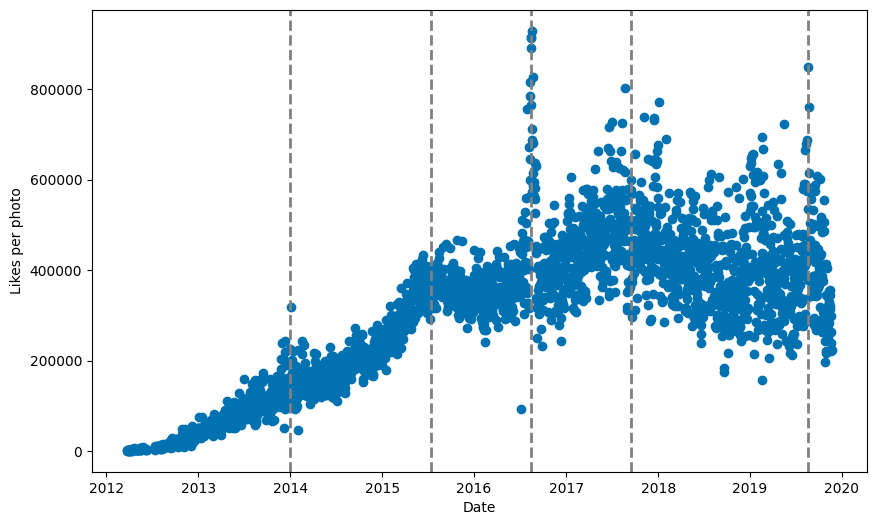

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.axvline(pd.to_datetime('2014-01-01'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2015-07-15'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2016-08-15'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2017-09-15'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2019-08-20'), c='gray', ls='--', lw=2)
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/xh4h2opx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/ociffsur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25438', 'data', 'file=/tmp/tmpza6n61e_/xh4h2opx.json', 'init=/tmp/tmpza6n61e_/ociffsur.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modelq0o72oss/prophet_model-20250709124947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


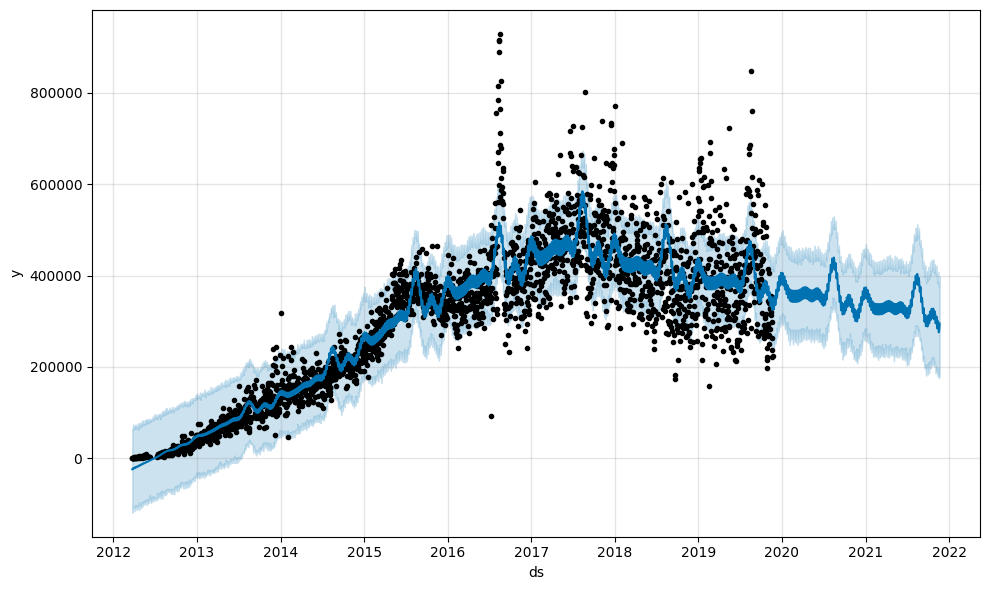

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

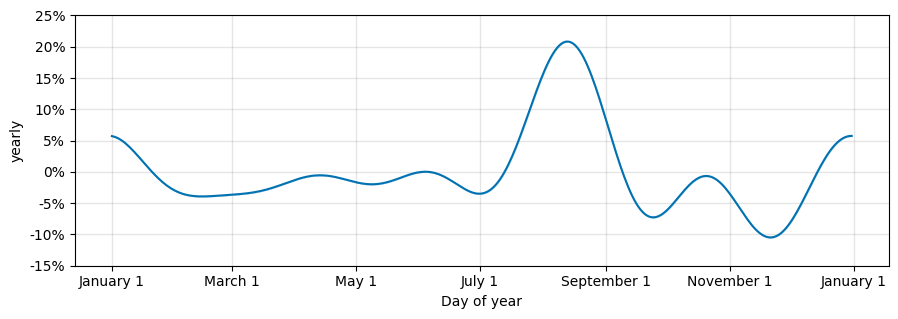

In [ ]:
from prophet.plot import plot_yearly

plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

In [ ]:
df2 = df[(df['ds'] < '2016-07-29') | (df['ds'] > '2016-09-01')]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/yt_1thnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/56jre77q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58592', 'data', 'file=/tmp/tmpza6n61e_/yt_1thnt.json', 'init=/tmp/tmpza6n61e_/56jre77q.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_model6eewg6xp/prophet_model-20250709125000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


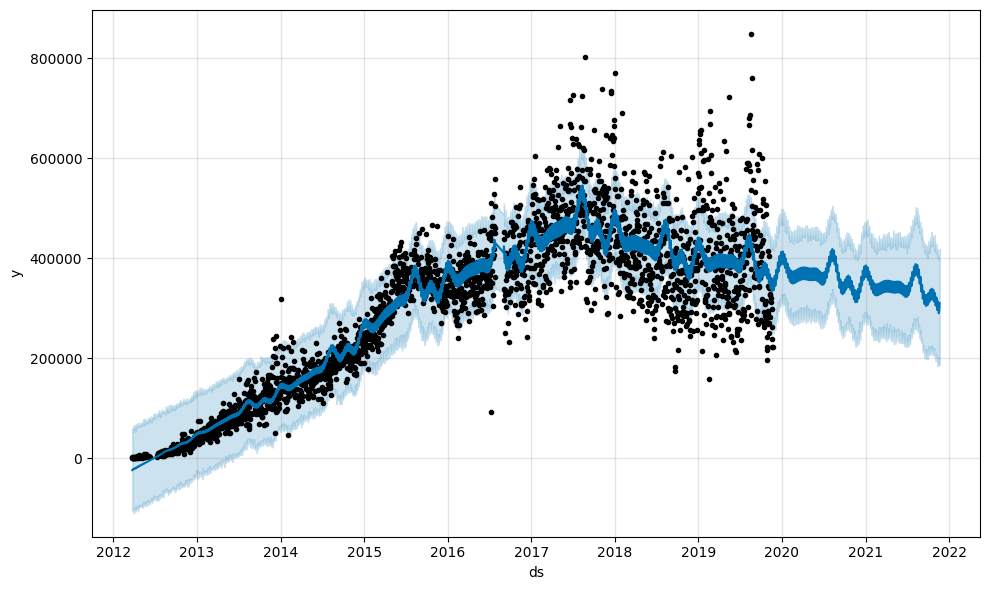

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df2)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

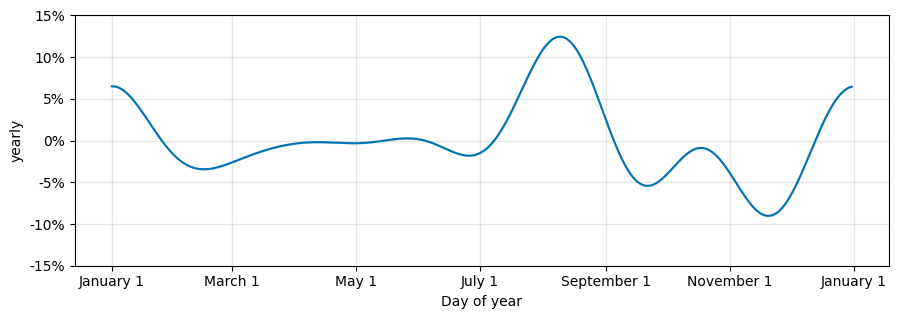

In [ ]:
plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

## 넓은 불확실성 구간을 초래하는 이상값 수정(Correcting outliers that cause wide uncertainty intervals)

In [ ]:
df3 = df.copy()
df3.loc[df3['ds'].dt.year == 2016, 'y'] = 100000

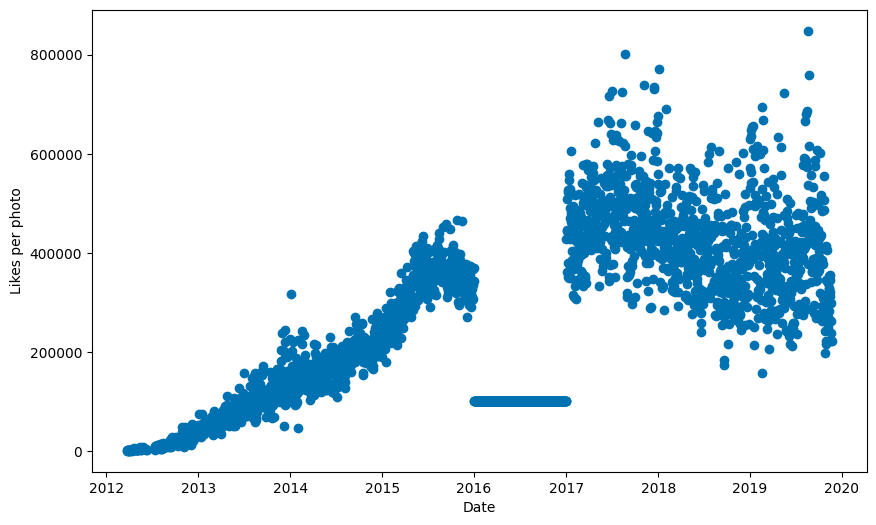

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df3['ds'], y=df3['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/5owbhwyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/vy4e4wax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76502', 'data', 'file=/tmp/tmpza6n61e_/5owbhwyq.json', 'init=/tmp/tmpza6n61e_/vy4e4wax.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modelhm5cc0yl/prophet_model-20250709125014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


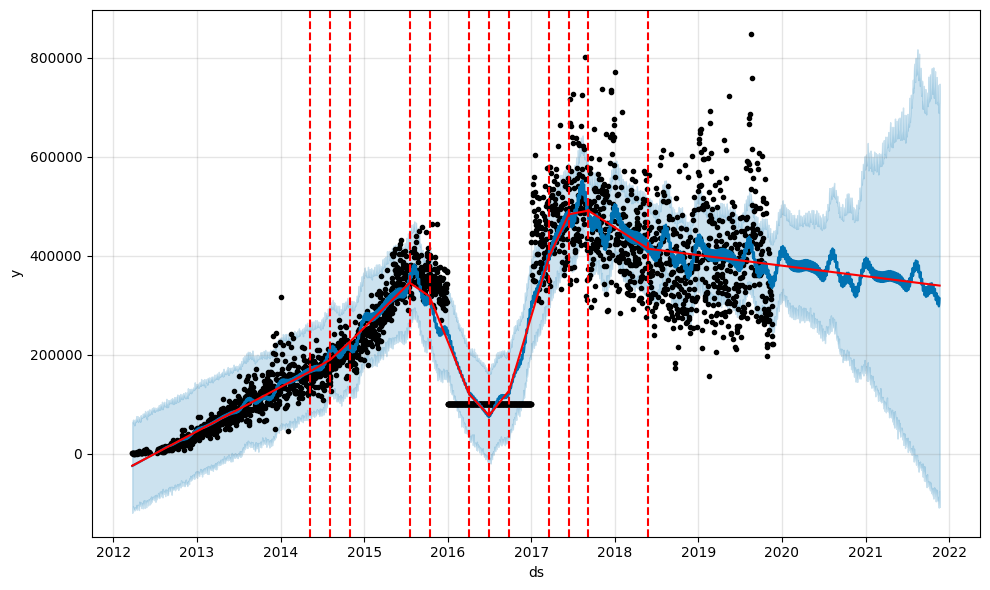

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df3)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [ ]:
df3.loc[df3['ds'].dt.year == 2016, 'y'] = None

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/6qaa6f0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/_guur3uv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73604', 'data', 'file=/tmp/tmpza6n61e_/6qaa6f0k.json', 'init=/tmp/tmpza6n61e_/_guur3uv.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modelzttjg1ub/prophet_model-20250709125021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


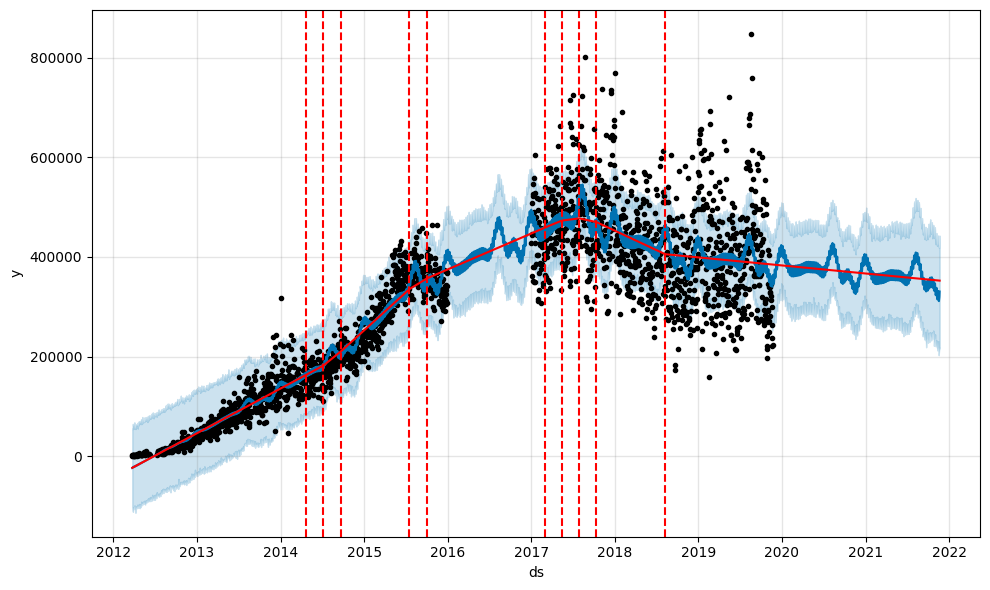

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df3)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

## 이상값 자동 탐지(Detecting outliers automatically)

### 윈저화(Winsorizing)

In [ ]:
from scipy import stats

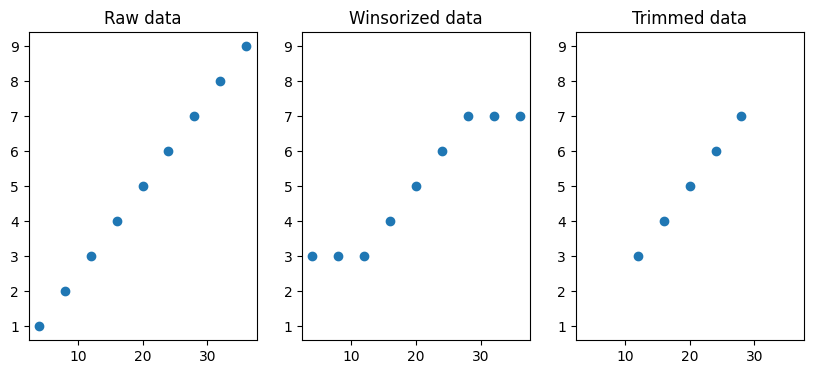

In [ ]:
### 역자 수정 코드
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import MaxNLocator

x = [4 * val for val in [1, 2, 3, 4, 5, 6, 7, 8, 9]]
y = np.array([.25 * val for val in x])  # 리스트 -> NumPy 배열 변환

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x, y)
ax1.title.set_text('Raw data')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x, stats.mstats.winsorize(y, limits=0.25))  # 리스트 오류 해결
ax2.title.set_text('Winsorized data')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x[2:-2], y[2:-2])
ax3.title.set_text('Trimmed data')
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

plt.show()


In [ ]:
df4 = df.copy().dropna()
df4['y'] = stats.mstats.winsorize(df4['y'], limits=(0, .05), axis=0)

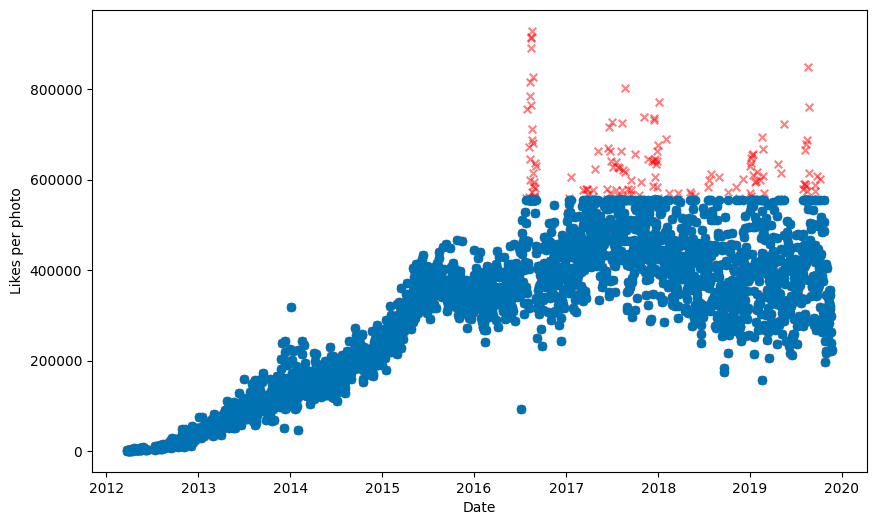

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df4['ds'], y=df4['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

### 표준편차(Standard deviation)

In [ ]:
df5 = df.copy().dropna()
df5 = df5[(stats.zscore(df5['y']) < 1.65)]

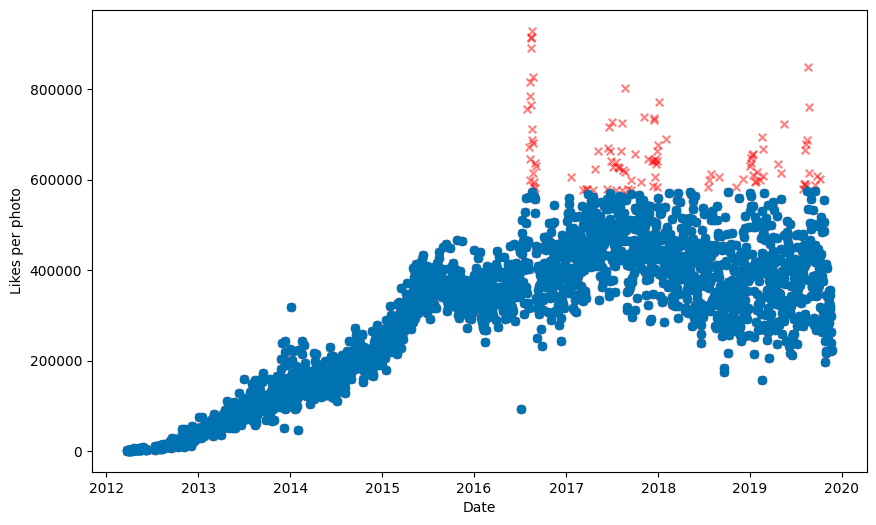

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df5['ds'], y=df5['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

### 이동평균(Moving average)

In [ ]:
df6 = df.copy().dropna()
df6['moving_average'] = df6.rolling(window=300,
                                    min_periods=1,
                                    center=True,
                                    on='ds')['y'].mean()
df6['std_dev'] = df6.rolling(window=300,
                             min_periods=1,
                             center=True,
                             on='ds')['y'].std()
df6['lower'] = df6['moving_average'] - 1.65 * df6['std_dev']
df6['upper'] = df6['moving_average'] + 1.65 * df6['std_dev']

df6 = df6[(df6['y'] < df6['upper']) & (df6['y'] > df6['lower'])]

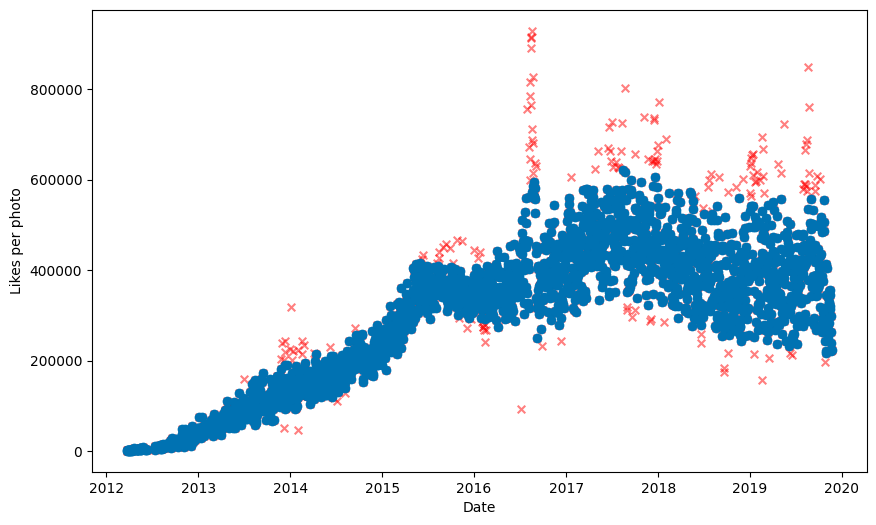

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df6['ds'], y=df6['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

### 오차의 표준편차(Error standard deviation)

In [ ]:
df7 = df.copy().dropna().reset_index()

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                seasonality_prior_scale=.01,
                changepoint_prior_scale=.01,
                interval_width=.90)
model.fit(df7)
forecast = model.predict()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/iugyst6x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/cumwmimk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57851', 'data', 'file=/tmp/tmpza6n61e_/iugyst6x.json', 'init=/tmp/tmpza6n61e_/cumwmimk.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modelwdytz2gf/prophet_model-20250709125053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df8 = df7[(df7['y'] > forecast['yhat_lower']) &
         (df7['y'] < forecast['yhat_upper'])]

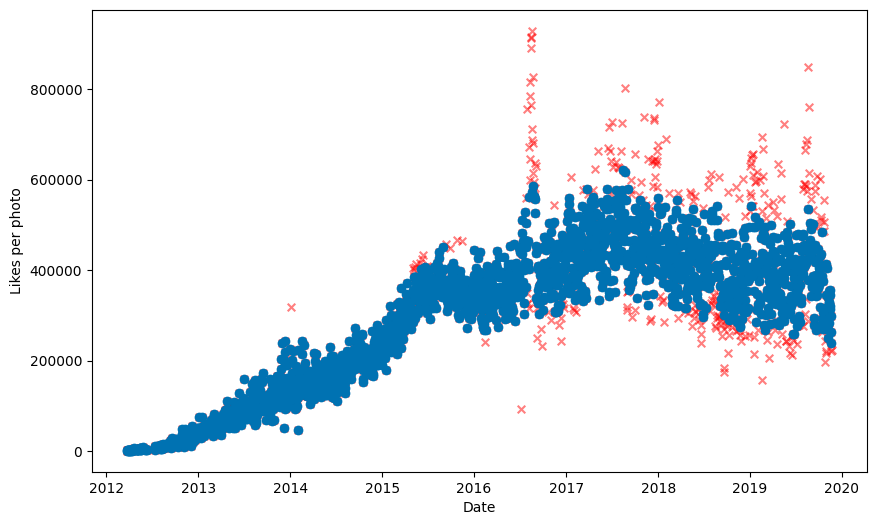

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df8['ds'], y=df8['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

## 이상값을 특별 이벤트로 모델링(Modeling outliers as special events)

In [ ]:
promo = pd.DataFrame({'holiday': 'Promo event',
                      'ds' : pd.to_datetime(['2016-07-29']),
                      'lower_window': 0,
                      'upper_window': 34})
future_promo = pd.DataFrame({'holiday': 'Promo event',
                      'ds' : pd.to_datetime(['2020-06-01']),
                      'lower_window': 0,
                      'upper_window': 34})

promos = pd.concat([promo, future_promo])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/1cbplbqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/ykk7_amu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60969', 'data', 'file=/tmp/tmpza6n61e_/1cbplbqo.json', 'init=/tmp/tmpza6n61e_/ykk7_amu.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modeli5vcky7w/prophet_model-20250709125106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


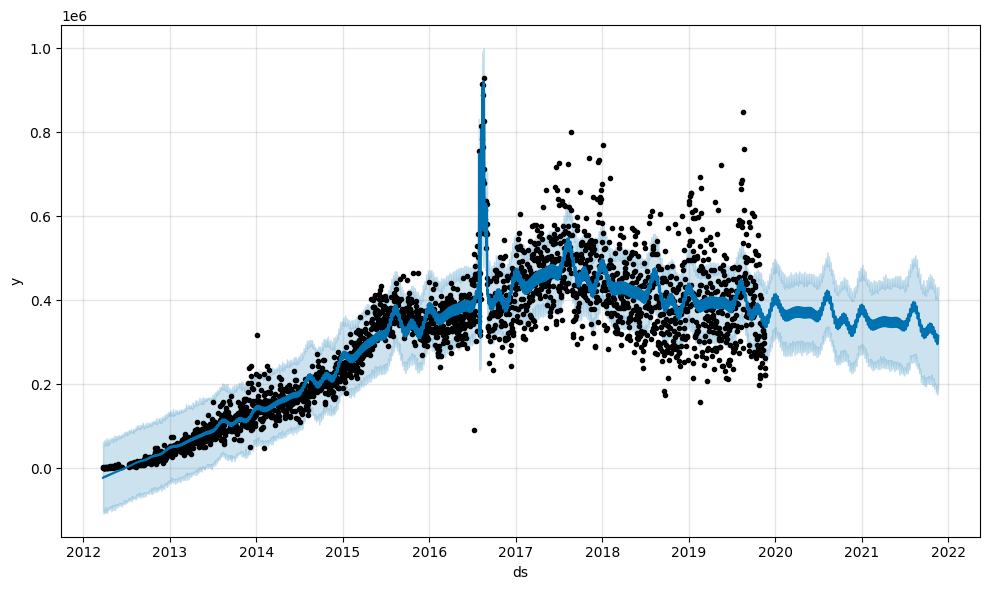

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=promo,
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/tzgeu85j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/iv6sugol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57976', 'data', 'file=/tmp/tmpza6n61e_/tzgeu85j.json', 'init=/tmp/tmpza6n61e_/iv6sugol.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modeljru71lgk/prophet_model-20250709125111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


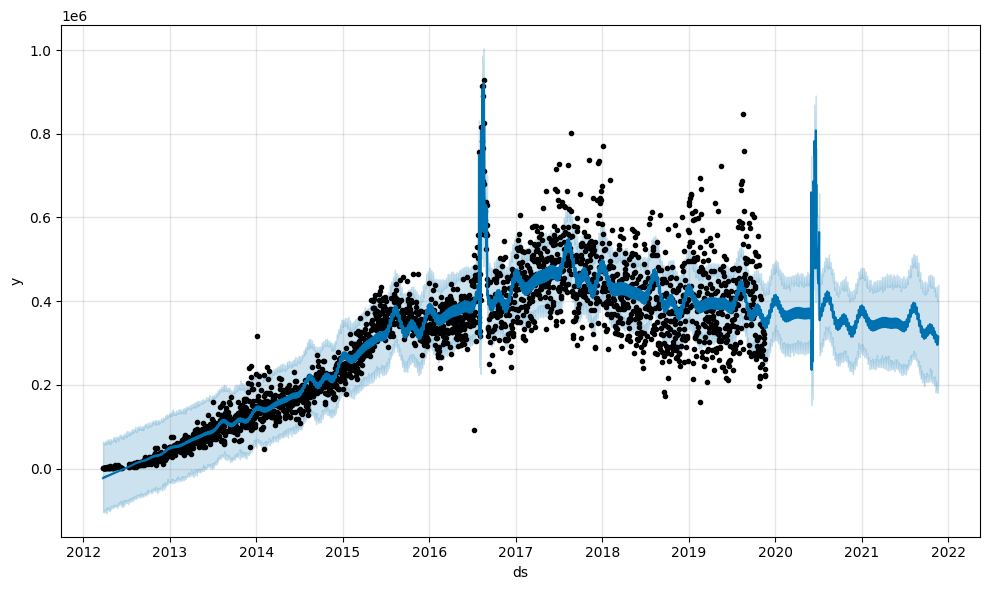

In [ ]:
# 위 코드 블록에서는 데이터프레임 promo를 사용했으나
# 여기서는 병합 데이터프레임 promos를 holidays 인자에 전달
model = Prophet(seasonality_mode='multiplicative',
                holidays=promos,
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

### Covid-19 봉쇄 충격 모델링(Modeling shocks as special events)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/pedestrian_counts.csv')
df['Date'] = pd.to_datetime(df['Date'])

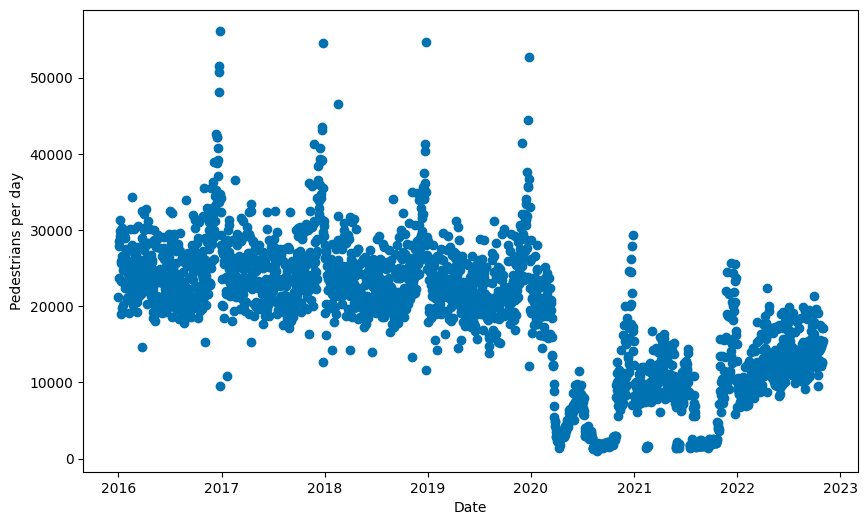

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Date'],
            y=df['Daily_Counts'],
            c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Pedestrians per day')
plt.show()

In [ ]:
df = df[['Date', 'Daily_Counts']]
df.columns = ['ds', 'y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/ql3wmb_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/um42z_cn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17036', 'data', 'file=/tmp/tmpza6n61e_/ql3wmb_w.json', 'init=/tmp/tmpza6n61e_/um42z_cn.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modeluj8gzivw/prophet_model-20250709125123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


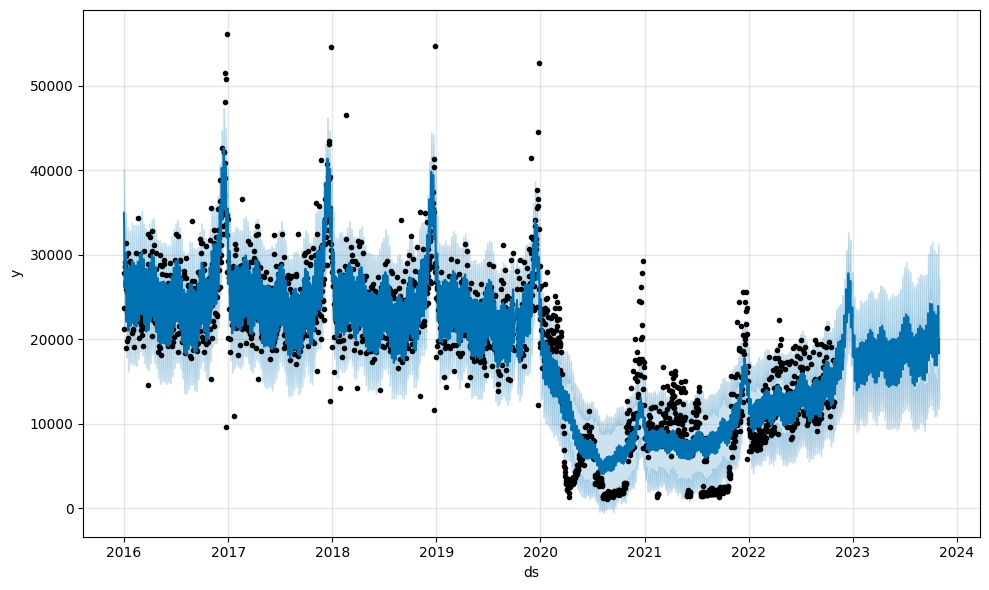

In [ ]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

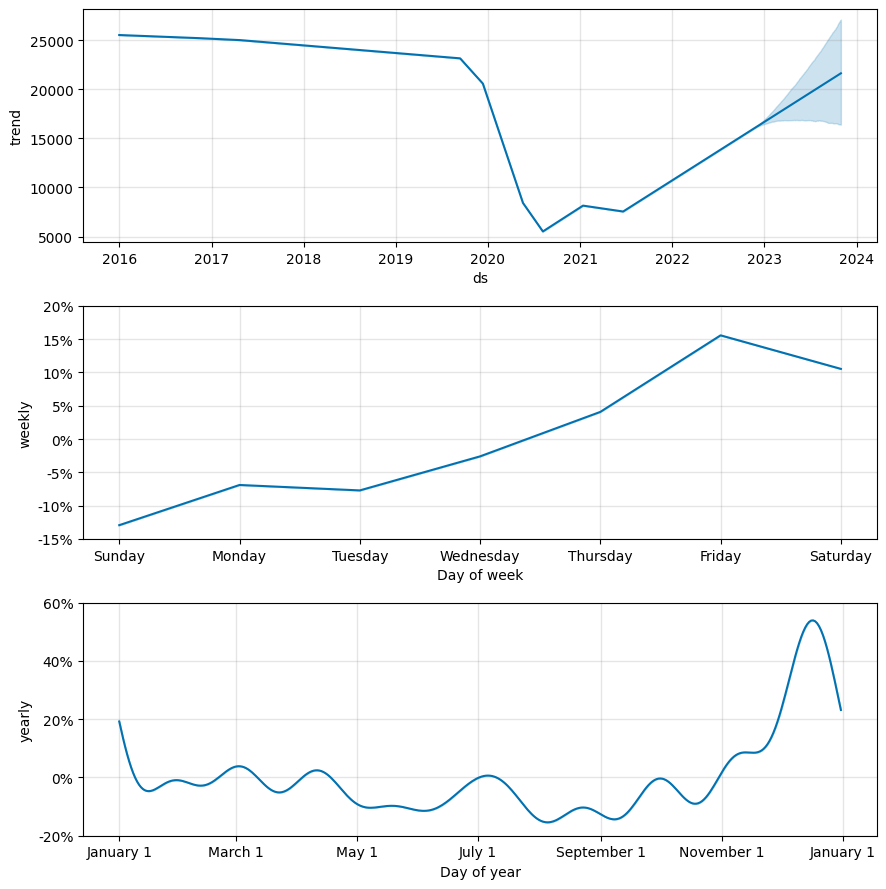

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
lockdowns = pd.DataFrame([
    {'holiday':'lockdown1',
     'ds': pd.to_datetime('2020-03-21'),
     'lower_window': 0,
     'upper_window': 77},
    {'holiday':'lockdown2',
     'ds': pd.to_datetime('2020-07-09'),
     'lower_window': 0,
     'upper_window': 110},
    {'holiday':'lockdown3',
     'ds': pd.to_datetime('2021-02-13'),
     'lower_window': 0,
     'upper_window': 4},
    {'holiday':'lockdown4',
     'ds': pd.to_datetime('2021-05-28'),
     'lower_window': 0,
     'upper_window': 13}])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/ypez28pb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/v3cdpt1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47757', 'data', 'file=/tmp/tmpza6n61e_/ypez28pb.json', 'init=/tmp/tmpza6n61e_/v3cdpt1j.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modelw2kb_vmo/prophet_model-20250709125135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


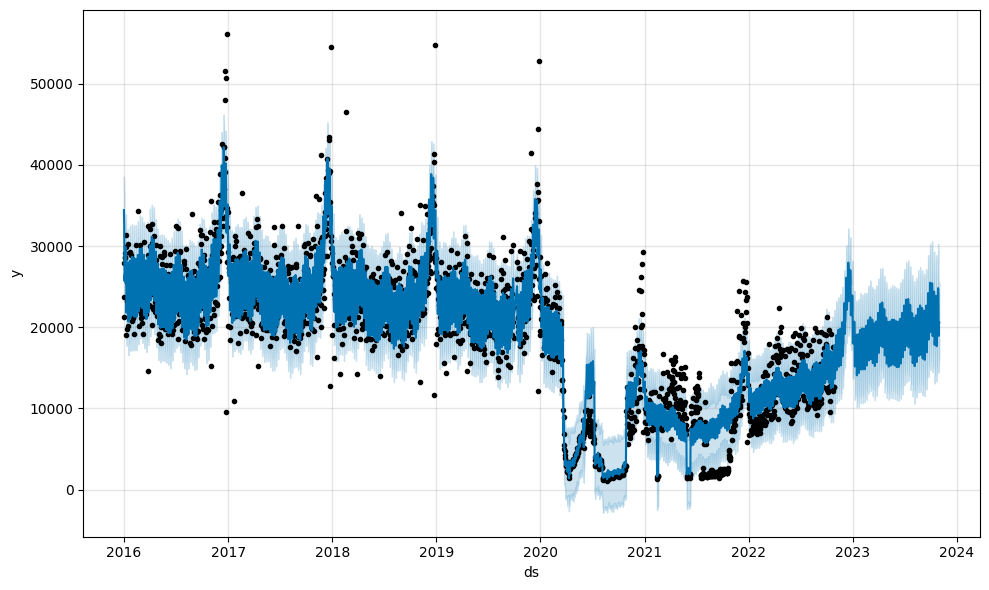

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=lockdowns)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

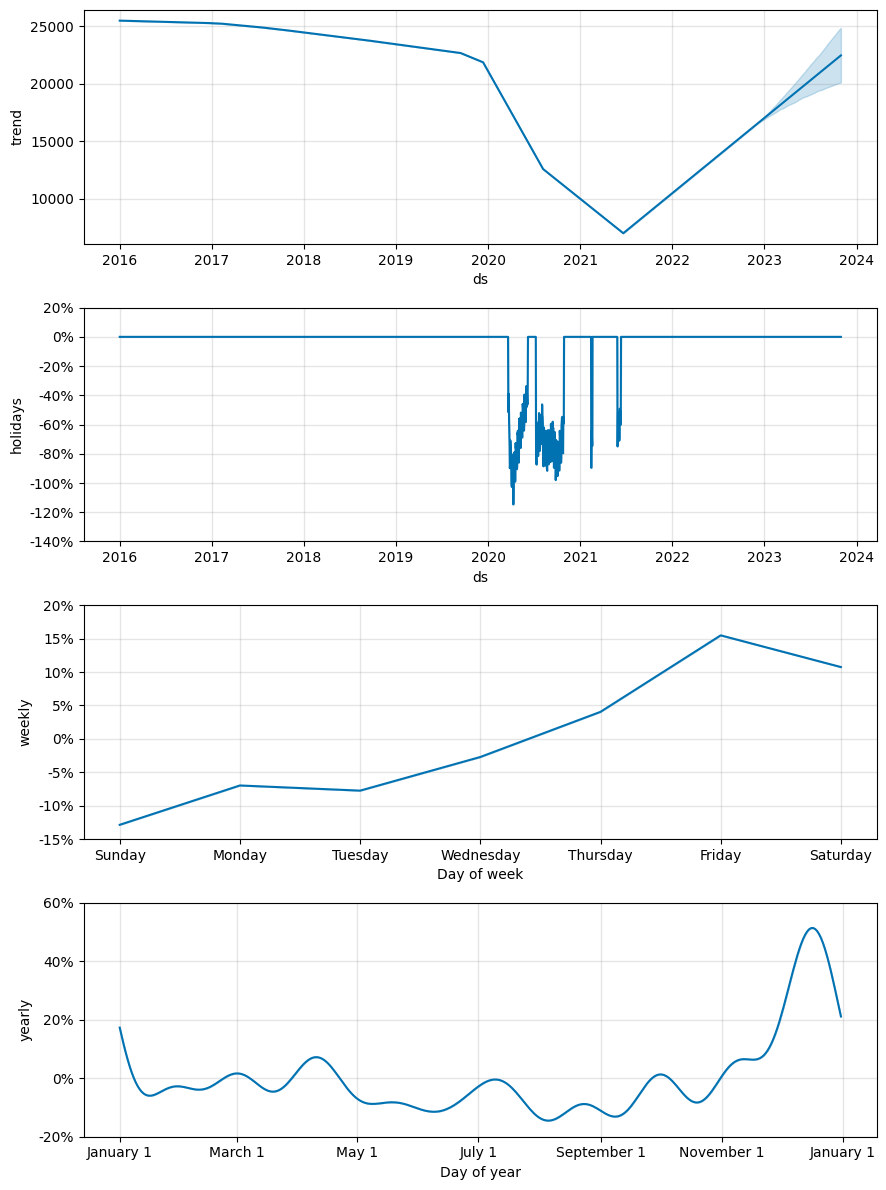

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
df['pre_covid'] = df['ds'] < '2020-03-21'
df['post_covid'] = df['ds'] > '2021-06-10'

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/riss7aqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpza6n61e_/jm0phuvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15694', 'data', 'file=/tmp/tmpza6n61e_/riss7aqw.json', 'init=/tmp/tmpza6n61e_/jm0phuvu.json', 'output', 'file=/tmp/tmpza6n61e_/prophet_modelgtn_tf_8/prophet_model-20250709125148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


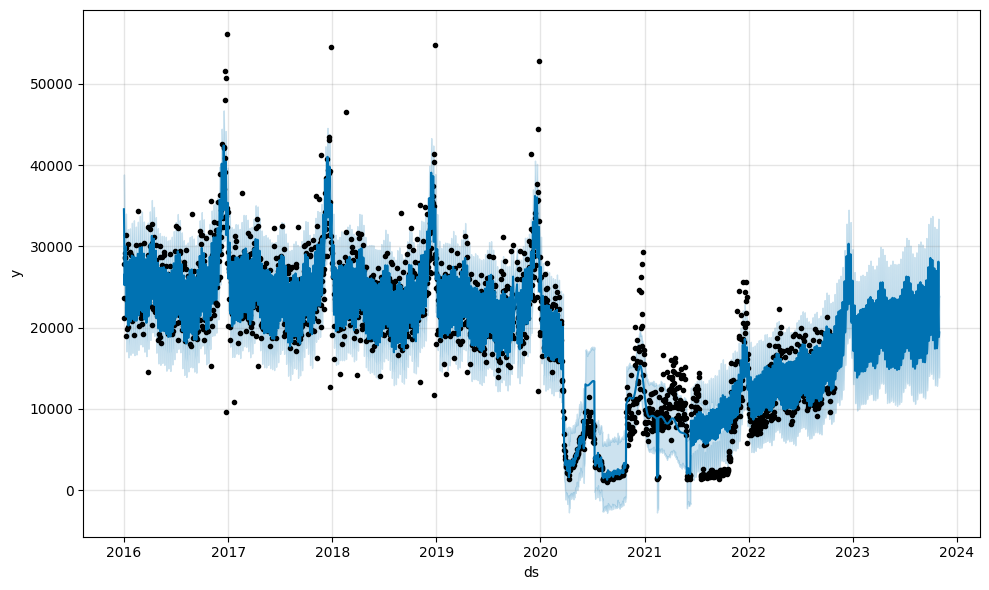

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                weekly_seasonality=False,
                holidays=lockdowns)
model.add_seasonality(
    name='weekly_pre_covid',
    period=7,
    fourier_order=3,
    condition_name='pre_covid',
)
model.add_seasonality(
    name='weekly_post_covid',
    period=7,
    fourier_order=3,
    condition_name='post_covid',
)
model.fit(df)
future = model.make_future_dataframe(periods=365)
future['pre_covid'] = future['ds'] < '2020-03-21'
future['post_covid'] = future['ds'] > '2021-06-10'
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

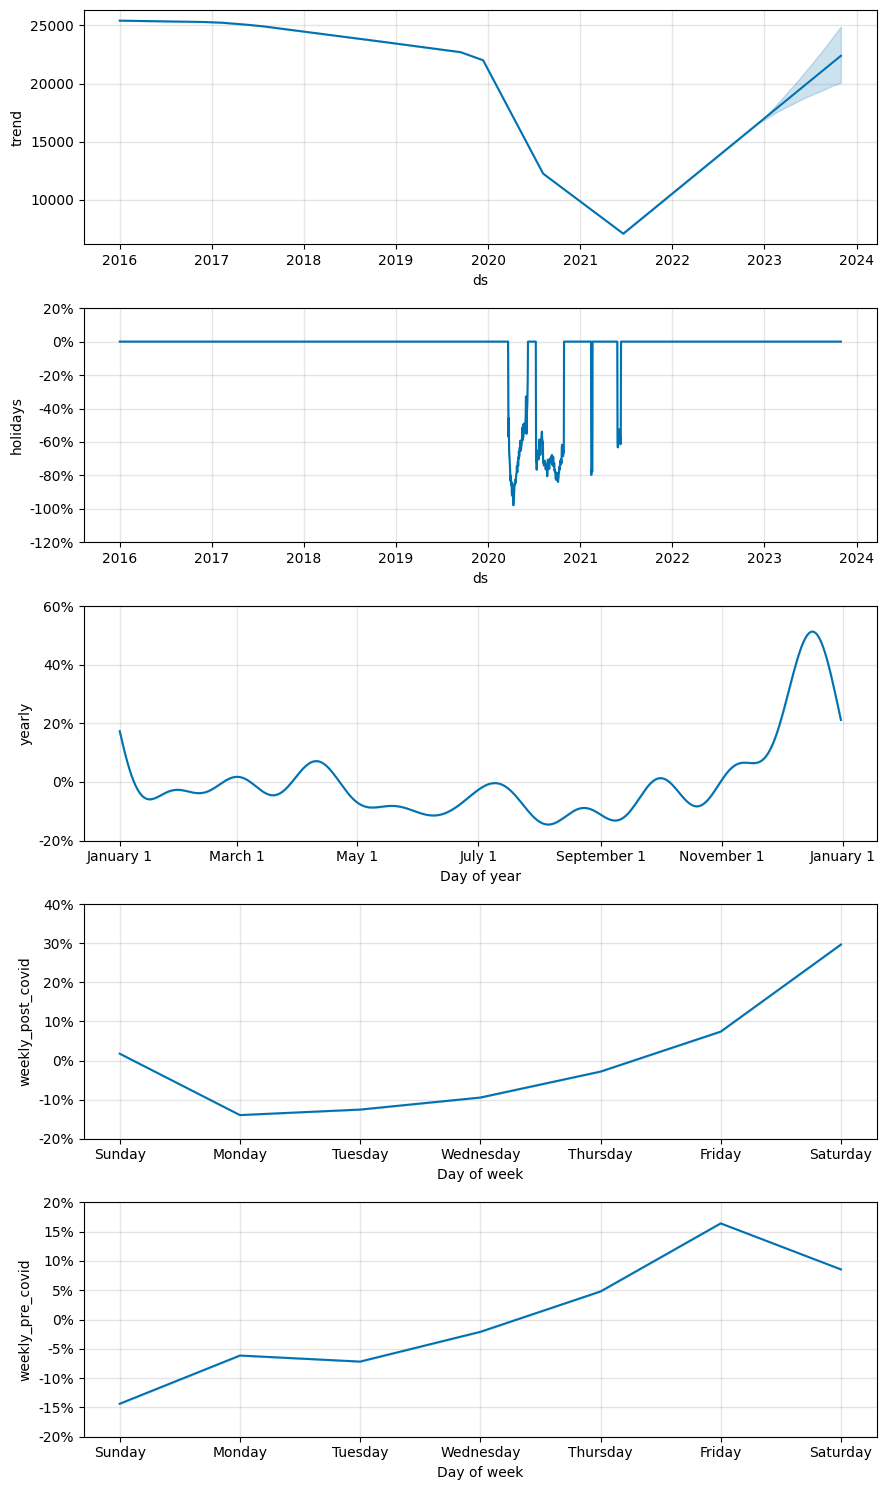

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()